In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from google.colab import drive
drive.mount('/content/drive')


data_path = '/content/drive/My Drive/nba_match.csv'
data = pd.read_csv(data_path)
data.shape

Mounted at /content/drive


(2451093, 10)

In [ ]:
# Supposons que 'data' est votre DataFrame initial.
# data = pd.read_csv('chemin/vers/votre/fichier.csv')

# Étape 1: Supprimer les colonnes inutiles
columns_to_drop = ['radius', 'game_id', 'event_id', 'shot_clock','game_clock','quarter']
data = data.drop(columns_to_drop, axis=1)

In [ ]:
data = data[(data['team_id'] != -1) & (data['player_id'] != -1)]
data.shape

(2228542, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes à normaliser
features_to_scale = ['x_loc', 'y_loc']

# Application du StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])

# Remplacement des colonnes originales par les caractéristiques normalisées
for i, feature_name in enumerate(features_to_scale):
    data[feature_name] = scaled_features[:, i]
import pandas as pd

# Supposons que votre DataFrame s'appelle data
# Appliquer l'encodage one-hot à la colonne team_id
team_id_encoded = pd.get_dummies(data['team_id'], prefix='team_id')

# Concaténer les colonnes encodées avec votre DataFrame original
data = pd.concat([data, team_id_encoded], axis=1)

# Maintenant, data contient les colonnes one-hot encodées pour team_id


In [ ]:
data.head(20)

,team_id,player_id,x_loc,y_loc,team_id_1610612737,team_id_1610612765
1,1610612737,2594,-0.152273,-0.797662,1,0
2,1610612737,200794,0.244286,-0.138025,1,0
3,1610612737,201143,-0.096695,-0.002402,1,0
4,1610612737,201952,-0.771548,-0.068736,1,0
5,1610612737,203145,-0.333775,0.646971,1,0
6,1610612765,101141,0.223218,0.090415,0,1
7,1610612765,202704,0.839907,0.088014,0,1
8,1610612765,202694,-0.047681,0.962283,0,1
9,1610612765,203484,-0.054276,-0.889219,0,1
10,1610612765,203083,-0.087981,-0.012384,0,1


In [ ]:
sequences = {}
for player_id in data['player_id'].unique():
    player_data = data[data['player_id'] == player_id]
    # Créer la séquence pour le joueur
    sequences[player_id] = player_data[['x_loc', 'y_loc', 'team_id_1610612737','team_id_1610612765']].values

In [ ]:
# Afficher le nombre total de joueurs (séquences)
print(f"Nombre total de joueurs (séquences) : {len(sequences)}")

# Afficher la taille de chaque séquence pour quelques joueurs
for player_id, sequence in sequences.items():
    print(f"Player ID: {player_id}, Taille de la séquence: {sequence.shape}")

    # Optionnel : Afficher le format de la séquence pour le premier joueur pour voir à quoi elle ressemble
    if player_id == list(sequences.keys())[0]:
        print(f"Format de la séquence pour le joueur {player_id} : {sequence}\n")
        print("Exemple de données de séquence :", sequence[:5], "\n")  # Afficher les 5 premières observations de la séquence

# Vérifier s'il y a bien une séquence pour chaque joueur unique dans le DataFrame original
unique_player_ids_in_df = set(data['player_id'].unique())
unique_player_ids_in_sequences = set(sequences.keys())

# Vérifier si tous les IDs de joueurs du DataFrame se trouvent dans les séquences
missing_players = unique_player_ids_in_df - unique_player_ids_in_sequences
if not missing_players:
    print("Chaque joueur unique dans le DataFrame a une séquence.")
else:
    print("Les joueurs suivants n'ont pas de séquences : ", missing_players)


Nombre total de joueurs (séquences) : 20
Player ID: 2594, Taille de la séquence: (142121, 4)
Format de la séquence pour le joueur 2594 : [[-0.15227295 -0.79766246  1.          0.        ]
 [-0.15247148 -0.79591328  1.          0.        ]
 [-0.15261709 -0.79441526  1.          0.        ]
 ...
 [-0.408257    0.72182139  1.          0.        ]
 [-0.40200172  0.7152966   1.          0.        ]
 [-0.39570063  0.7091776   1.          0.        ]]

Exemple de données de séquence : [[-0.15227295 -0.79766246  1.          0.        ]
 [-0.15247148 -0.79591328  1.          0.        ]
 [-0.15261709 -0.79441526  1.          0.        ]
 [-0.152697   -0.79276708  1.          0.        ]
 [-0.15270481 -0.79138704  1.          0.        ]] 

Player ID: 200794, Taille de la séquence: (174691, 4)
Player ID: 201143, Taille de la séquence: (138226, 4)
Player ID: 201952, Taille de la séquence: (156522, 4)
Player ID: 203145, Taille de la séquence: (78327, 4)
Player ID: 101141, Taille de la séquence: (1

**FORWARD** 1 : Distribution gaussienne

In [41]:
import numpy as np

# Nombre total de pas dans le processus de bruitage
N = 1000
gamma_min = 0.1
gamma_max = 0.9

# Créer un programme linéaire pour gamma
gammas = np.linspace(gamma_max, gamma_min, N)

# Appliquer le forward process avec un programme variable de gammas
noisy_sequences = {}
for player_id, sequence in sequences.items():
    # Créer une nouvelle séquence pour les données bruitées
    noisy_sequence = np.copy(sequence)
    # Appliquer le processus de bruitement avec un gamma variable à chaque pas de temps
    for t in range(1, len(sequence)):
        k = min(t, N-1)  # Assurez-vous de ne pas dépasser le nombre de gammas définis
        gamma = gammas[k]
        # Z_t est un échantillon de bruit gaussien avec la même forme que X_t
        Z_t = np.random.normal(0, 1, size=sequence[t].shape)
        noisy_sequence[t] = gamma * sequence[t - 1] + np.sqrt(1 - gamma**2) * Z_t

    # Stocker la séquence bruitée
    noisy_sequences[player_id] = noisy_sequence


In [ ]:
# Afficher la taille des séquences originales et bruitées pour les premiers joueurs
for player_id in list(sequences.keys())[:5]:  # Modifier selon le besoin pour voir plus de joueurs
    original_shape = sequences[player_id].shape
    noisy_shape = noisy_sequences[player_id].shape
    print(f"Original Player ID: {player_id}, Taille de la séquence: {original_shape}")
    print(f"Noisy Player ID: {player_id}, Taille de la séquence: {noisy_shape}\n")


Original Player ID: 2594, Taille de la séquence: (142121, 4)
Noisy Player ID: 2594, Taille de la séquence: (142121, 4)

Original Player ID: 200794, Taille de la séquence: (174691, 4)
Noisy Player ID: 200794, Taille de la séquence: (174691, 4)

Original Player ID: 201143, Taille de la séquence: (138226, 4)
Noisy Player ID: 201143, Taille de la séquence: (138226, 4)

Original Player ID: 201952, Taille de la séquence: (156522, 4)
Noisy Player ID: 201952, Taille de la séquence: (156522, 4)

Original Player ID: 203145, Taille de la séquence: (78327, 4)
Noisy Player ID: 203145, Taille de la séquence: (78327, 4)



Joueur 2594 - Original: Moyenne = [0.0476492  0.00729542 1.         0.        ], Écart-type = [0.99372328 1.1831214  0.         0.        ]
Joueur 2594 - Bruitée: Moyenne = [0.00500301 0.002354   0.10868245 0.00401849], Écart-type = [0.9985215  1.00034429 0.99717527 0.99537357]



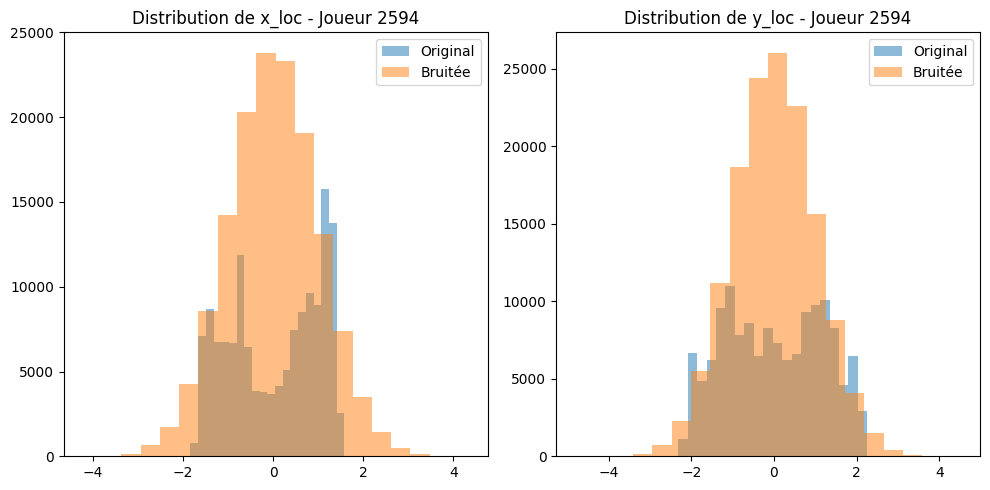

Joueur 200794 - Original: Moyenne = [0.07497405 0.05136978 1.         0.        ], Écart-type = [1.04373054 0.69399384 0.         0.        ]
Joueur 200794 - Bruitée: Moyenne = [0.00359907 0.004115   0.09982634 0.00072323], Écart-type = [0.99882904 0.99497502 0.99630023 0.99289701]



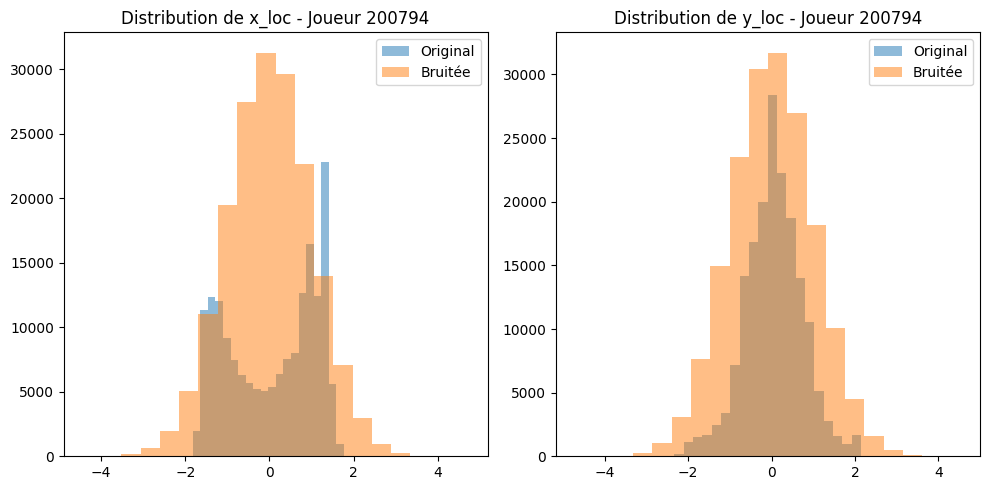

Joueur 201143 - Original: Moyenne = [ 0.08166825 -0.06246046  1.          0.        ], Écart-type = [1.04790882 0.58605816 0.         0.        ]
Joueur 201143 - Bruitée: Moyenne = [ 0.00951713 -0.00578443  0.10453158 -0.00022862], Écart-type = [1.00168444 0.99344016 0.99680073 0.99277737]



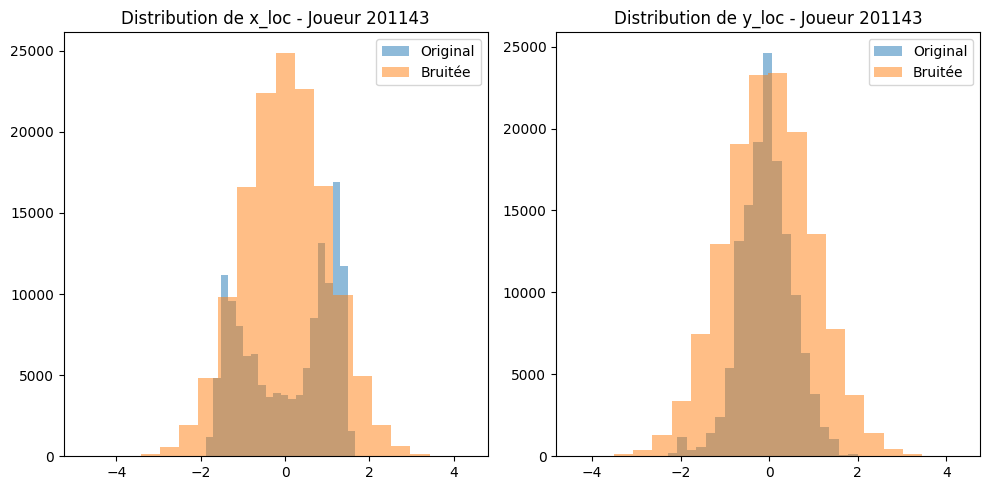

Joueur 201952 - Original: Moyenne = [ 0.01088839 -0.07728056  1.          0.        ], Écart-type = [0.86305633 0.98998671 0.         0.        ]
Joueur 201952 - Bruitée: Moyenne = [-0.00290725 -0.00523374  0.10242323  0.00159392], Écart-type = [0.99903018 0.99805037 0.99313061 0.99551211]



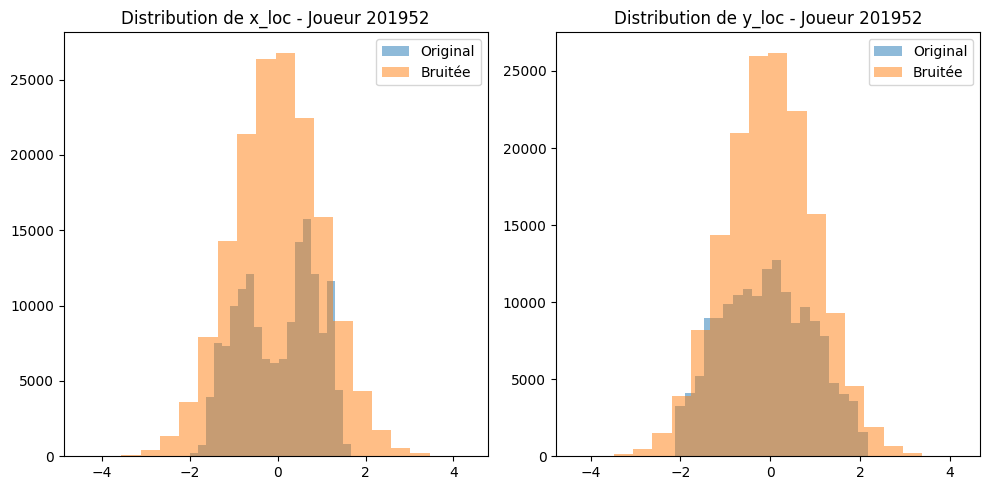

Joueur 203145 - Original: Moyenne = [-0.15317501 -0.04584047  1.          0.        ], Écart-type = [1.04462151 1.22355084 0.         0.        ]
Joueur 203145 - Bruitée: Moyenne = [-0.02366072  0.00096832  0.10090273 -0.0013945 ], Écart-type = [1.00071199 1.00684306 0.99753829 0.99951749]



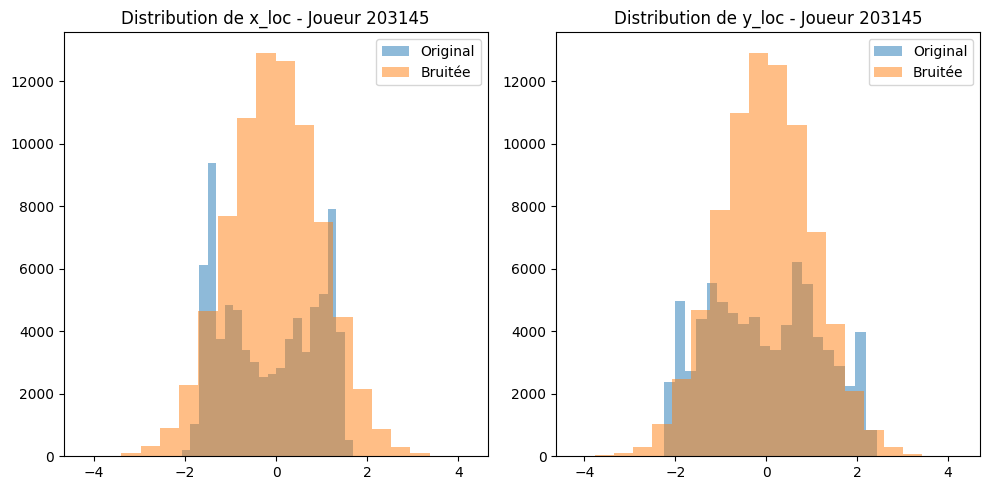

In [ ]:
import numpy as np

# Afficher des statistiques pour les séquences originales et bruitées
for player_id in list(sequences.keys())[:5]:  # Vous pouvez augmenter la plage selon le besoin
    original_sequence = sequences[player_id]
    noisy_sequence = noisy_sequences[player_id]

    # Calcul des statistiques pour la séquence originale
    original_mean = np.mean(original_sequence, axis=0)
    original_std = np.std(original_sequence, axis=0)

    # Calcul des statistiques pour la séquence bruitée
    noisy_mean = np.mean(noisy_sequence, axis=0)
    noisy_std = np.std(noisy_sequence, axis=0)

    # Affichage des statistiques
    print(f"Joueur {player_id} - Original: Moyenne = {original_mean}, Écart-type = {original_std}")
    print(f"Joueur {player_id} - Bruitée: Moyenne = {noisy_mean}, Écart-type = {noisy_std}\n")

    # Vous pouvez également visualiser les distributions pour comparer
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))

    # Tracer la distribution de x_loc pour la séquence originale et bruitée
    plt.subplot(1, 2, 1)
    plt.hist(original_sequence[:, 0], bins=20, alpha=0.5, label="Original")
    plt.hist(noisy_sequence[:, 0], bins=20, alpha=0.5, label="Bruitée")
    plt.title(f'Distribution de x_loc - Joueur {player_id}')
    plt.legend()

    # Tracer la distribution de y_loc pour la séquence originale et bruitée
    plt.subplot(1, 2, 2)
    plt.hist(original_sequence[:, 1], bins=20, alpha=0.5, label="Original")
    plt.hist(noisy_sequence[:, 1], bins=20, alpha=0.5, label="Bruitée")
    plt.title(f'Distribution de y_loc - Joueur {player_id}')
    plt.legend()

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


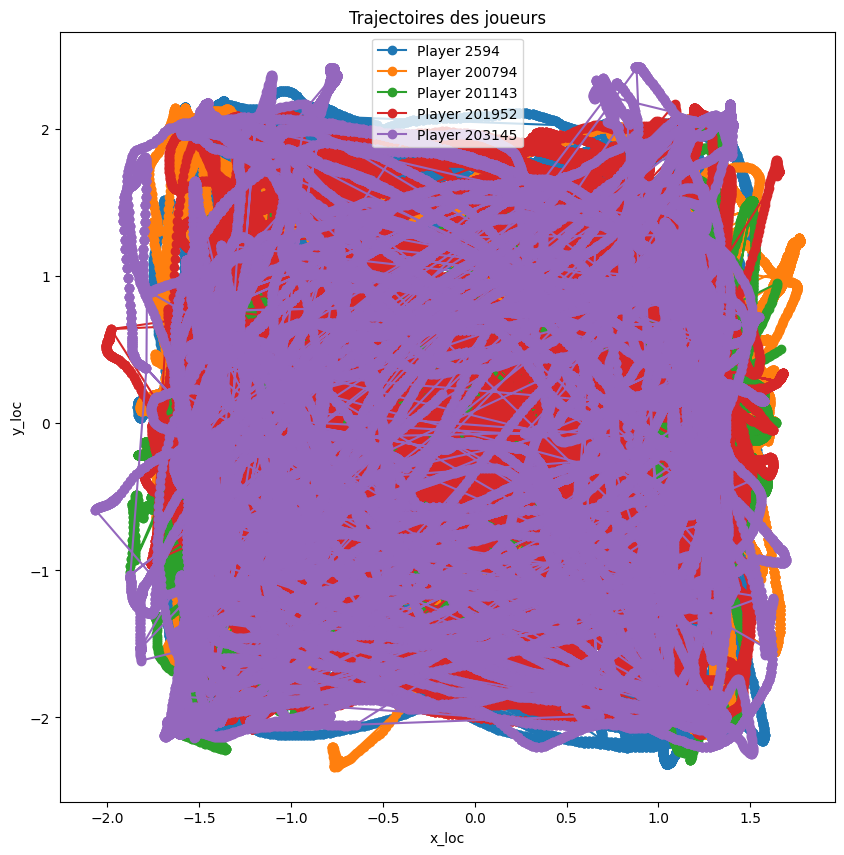

In [ ]:
import matplotlib.pyplot as plt

# Choisissez un petit nombre de player_id pour visualiser
player_ids_to_plot = list(data['player_id'].unique())[:5]  # Modifier selon le besoin

# Créer une figure et des axes
plt.figure(figsize=(10, 10))

for player_id in player_ids_to_plot:
    sequence = sequences[player_id]
    # Ici, sequence[:, 0] représente x_loc et sequence[:, 1] représente y_loc
    plt.plot(sequence[:, 0], sequence[:, 1], marker='o', label=f'Player {player_id}')

# Ajouter des légendes et des titres
plt.title('Trajectoires des joueurs')
plt.xlabel('x_loc')
plt.ylabel('y_loc')
plt.legend()
plt.show()


L'objectif du processus de bruitage (forward process) dans les modèles de diffusion débruitants est de transformer graduellement la distribution de vos données originales en une distribution qui est facile à échantillonner, typiquement une distribution normale standard avec une moyenne de zéro et une variance (écart type) de un.

TENTATIVE 1 : modèle 0 simplifié

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your original and noisy trajectories stored in arrays original_trajectories and noisy_trajectories
# Assuming the trajectories for each player are organized in a dictionary format, where the keys are player IDs

# Select the trajectories for Player ID: 2594
player_id = 2594
original_trajectory_player_2594 = sequences[player_id]
noisy_trajectory_player_2594 = noisy_sequences[player_id]

# Split the original and noisy trajectories for Player ID: 2594 into training and testing sets
x_train_player_2594, x_test_player_2594, x_train_noisy_player_2594, x_test_noisy_player_2594 = train_test_split(original_trajectory_player_2594, noisy_trajectory_player_2594, test_size=0.2, random_state=42)

# Calculate the difference between the original and noisy trajectories for the training and testing sets
y_train_player_2594 = x_train_player_2594 - x_train_noisy_player_2594
y_test_player_2594 = x_test_player_2594 - x_test_noisy_player_2594



In [ ]:
y_train_player_2594.shape

(113696, 4)

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        x = hn[-1]
        return self.fc(x)

# Assurez-vous de remplacer ces dimensions par celles correspondant à vos données
input_size = 4
hidden_size = 128
output_size = 4
epochs = 100

model = LSTMModel(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Conversion des données d'entraînement de Numpy à Torch Tensor
x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)

# Boucle d'entraînement
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train_player_2594.unsqueeze(0))  # Ajoute une dimension de batch_size
    loss = criterion(output, y_train_player_2594.unsqueeze(0))
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


<ipython-input-70-832eb18d7f1e>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
<ipython-input-70-832eb18d7f1e>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)


Epoch 1/100, Loss: 1.6592460870742798
Epoch 2/100, Loss: 1.6431355476379395
Epoch 3/100, Loss: 1.6273412704467773
Epoch 4/100, Loss: 1.6116422414779663
Epoch 5/100, Loss: 1.5957989692687988
Epoch 6/100, Loss: 1.5795905590057373
Epoch 7/100, Loss: 1.562831163406372
Epoch 8/100, Loss: 1.5453684329986572
Epoch 9/100, Loss: 1.527138352394104
Epoch 10/100, Loss: 1.508383870124817
Epoch 11/100, Loss: 1.4904108047485352
Epoch 12/100, Loss: 1.4786351919174194
Epoch 13/100, Loss: 1.4934093952178955
Epoch 14/100, Loss: 1.4978327751159668
Epoch 15/100, Loss: 1.4869270324707031
Epoch 16/100, Loss: 1.4794596433639526
Epoch 17/100, Loss: 1.4775235652923584
Epoch 18/100, Loss: 1.4784071445465088
Epoch 19/100, Loss: 1.4801126718521118
Epoch 20/100, Loss: 1.4816794395446777
Epoch 21/100, Loss: 1.4827297925949097
Epoch 22/100, Loss: 1.4831658601760864
Epoch 23/100, Loss: 1.4830209016799927
Epoch 24/100, Loss: 1.4823955297470093
Epoch 25/100, Loss: 1.4814296960830688
Epoch 26/100, Loss: 1.480289697647094

In [ ]:
x_test_player_2594 = torch.tensor(x_test_player_2594, dtype=torch.float32)
y_test_player_2594 = torch.tensor(y_test_player_2594, dtype=torch.float32)
model.eval()  # Mettre le modèle en mode évaluation

with torch.no_grad():  # Désactiver le calcul des gradients
    predictions = model(x_test_player_2594.unsqueeze(0))
    test_loss = criterion(predictions, y_test_player_2594.unsqueeze(0))

print(f'Test Loss: {test_loss.item()}')


<ipython-input-72-e777c25cb6bb>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_player_2594 = torch.tensor(x_test_player_2594, dtype=torch.float32)
<ipython-input-72-e777c25cb6bb>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_player_2594 = torch.tensor(y_test_player_2594, dtype=torch.float32)


Test Loss: 1.4720165729522705


TRES MAUVAIS REVERS PROCESS : on est cense faire entrer le temps dans le process de prediciton grosse erreur de generation ecoutez moulines

In [34]:
import numpy as np

num_samples = 1000
num_features = 4

# Générer des données aléatoires suivant une distribution normale (gaussienne centrée réduite)
generated_data = np.random.normal(loc=0.0, scale=1.0, size=(num_samples, num_features))
import torch

# Conversion des données générées en Tensor PyTorch
generated_data_tensor = torch.tensor(generated_data, dtype=torch.float32)

# S'assurer que le modèle est en mode évaluation
model.eval()

# Utiliser le modèle pour prédire/débruiter les données
with torch.no_grad():
    denoised_data = model(generated_data_tensor)



In [39]:
denoised_data_numpy = denoised_data.detach().numpy()

In [40]:
denoised_data_numpy

array([ 0.0186924 ,  0.00507176,  0.31854823, -0.41416487], dtype=float32)

TEST 2 : Modèle 2 : LSTM ET DENSE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EnhancedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(EnhancedLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM avec plusieurs couches
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)

        # Une couche de dropout pour la régularisation
        self.dropout = nn.Dropout(0.2)

        # Plusieurs couches linéaires pour une transformation plus profonde avant la sortie
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)

    def forward(self, x):
        # Initialiser les états cachés à zéro
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Passage à travers le LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Prendre uniquement la dernière sortie du LSTM
        out = out[:, -1, :]

        # Passage à travers la couche de dropout
        out = self.dropout(out)

        # Passage à travers les couches linéaires
        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        return out


In [ ]:
# Paramètres du modèle
input_size = 4  # Nombre de caractéristiques d'entrée
hidden_size = 128  # Taille de la couche cachée
output_size = 4  # Taille de sortie (nombre de caractéristiques à prédire)
num_layers = 3  # Nombre de couches LSTM

# Initialisation du modèle
model = EnhancedLSTMModel(input_size, hidden_size, output_size, num_layers)

# Configuration de l'optimiseur et de la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Conversion des données d'entraînement de Numpy à Torch Tensor
x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)

# Boucle d'entraînement
epochs = 100  # Nombre d'époques pour l'entraînement
for epoch in range(epochs):
    model.train()  # Met le modèle en mode entraînement
    optimizer.zero_grad()  # Réinitialise les gradients
    output = model(x_train_player_2594.unsqueeze(0))  # Ajoute une dimension de batch_size
    loss = criterion(output, y_train_player_2594.unsqueeze(0))
    loss.backward()  # Rétropropagation
    optimizer.step()  # Mise à jour des poids
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


<ipython-input-74-442237e5bbcc>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
<ipython-input-74-442237e5bbcc>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)


Epoch 1/100, Loss: 1.7324639558792114
Epoch 2/100, Loss: 1.7188788652420044
Epoch 3/100, Loss: 1.7027814388275146
Epoch 4/100, Loss: 1.6931101083755493
Epoch 5/100, Loss: 1.6861233711242676
Epoch 6/100, Loss: 1.668803334236145
Epoch 7/100, Loss: 1.6517022848129272
Epoch 8/100, Loss: 1.6369414329528809
Epoch 9/100, Loss: 1.6132441759109497
Epoch 10/100, Loss: 1.5711954832077026
Epoch 11/100, Loss: 1.5195350646972656
Epoch 12/100, Loss: 1.4905394315719604
Epoch 13/100, Loss: 1.4902929067611694
Epoch 14/100, Loss: 1.492585301399231
Epoch 15/100, Loss: 1.5156108140945435
Epoch 16/100, Loss: 1.5142560005187988
Epoch 17/100, Loss: 1.492889165878296
Epoch 18/100, Loss: 1.486781358718872
Epoch 19/100, Loss: 1.4888815879821777
Epoch 20/100, Loss: 1.4781579971313477
Epoch 21/100, Loss: 1.4828770160675049
Epoch 22/100, Loss: 1.4851107597351074
Epoch 23/100, Loss: 1.496930718421936
Epoch 24/100, Loss: 1.4847735166549683
Epoch 25/100, Loss: 1.491652250289917
Epoch 26/100, Loss: 1.4828702211380005
E

KeyboardInterrupt: 

MODELE 3: double LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiLayerLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MultiLayerLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM multi-couches
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.5)

        # Couche de sortie
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialiser les états cachés et cellules à zéro
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Passage à travers le LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Prendre uniquement la dernière sortie du LSTM
        out = out[:, -1, :]

        # Passage à travers la couche de sortie
        out = self.fc(out)

        return out


In [ ]:
# Paramètres du modèle
input_size = 4  # Nombre de caractéristiques d'entrée
hidden_size = 128  # Taille de la couche cachée
output_size = 4  # Taille de sortie (nombre de caractéristiques à prédire)
num_layers = 2  # Nombre de couches LSTM

# Initialisation du modèle
model = MultiLayerLSTMModel(input_size, hidden_size, output_size, num_layers)

# Configuration de l'optimiseur et de la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Conversion des données d'entraînement de Numpy à Torch Tensor
x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)

# Boucle d'entraînement
epochs = 100  # Nombre d'époques pour l'entraînement
for epoch in range(epochs):
    model.train()  # Met le modèle en mode entraînement
    optimizer.zero_grad()  # Réinitialise les gradients
    output = model(x_train_player_2594.unsqueeze(0))  # Ajoute une dimension de batch_size
    loss = criterion(output, y_train_player_2594.unsqueeze(0))
    loss.backward()  # Rétropropagation
    optimizer.step()  # Mise à jour des poids
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

<ipython-input-76-09243f696fe4>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
<ipython-input-76-09243f696fe4>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 113696, 4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 1.6531041860580444
Epoch 2/100, Loss: 1.6336289644241333
Epoch 3/100, Loss: 1.6155595779418945
Epoch 4/100, Loss: 1.5923151969909668
Epoch 5/100, Loss: 1.5721821784973145
Epoch 6/100, Loss: 1.54986572265625
Epoch 7/100, Loss: 1.532195806503296
Epoch 8/100, Loss: 1.5048532485961914
Epoch 9/100, Loss: 1.482000708580017
Epoch 10/100, Loss: 1.5041868686676025
Epoch 11/100, Loss: 1.504659652709961
Epoch 12/100, Loss: 1.487054467201233
Epoch 13/100, Loss: 1.4796693325042725
Epoch 14/100, Loss: 1.4785100221633911
Epoch 15/100, Loss: 1.4842017889022827
Epoch 16/100, Loss: 1.488852858543396
Epoch 17/100, Loss: 1.4844163656234741
Epoch 18/100, Loss: 1.4860671758651733
Epoch 19/100, Loss: 1.483515977859497
Epoch 20/100, Loss: 1.4824163913726807
Epoch 21/100, Loss: 1.4800620079040527
Epoch 22/100, Loss: 1.478169322013855
Epoch 23/100, Loss: 1.4780032634735107
Epoch 24/100, Loss: 1.4774322509765625
Epoch 25/100, Loss: 1.4777820110321045
Epoch 26/100, Loss: 1.4776498079299927
Epoc

In the original implementation of DDPMs, the U-Net consists of Wide ResNet blocks, group normalization as well as self-attention blocks.

Perte PDS Pondérée (Loss Function Weighting) : La fonction de perte pondérée est directement liée à l'entraînement du modèle. Vous utilisez cette fonction de perte lors de l'entraînement du réseau de neurones pour le processus de débruitage. Le but est d'apprendre à prédire ou à annuler le bruit ajouté à chaque étape du processus de bruitement.

**FORWARD TENTATIVE 2 **: Gausienne avec moyenne et variance de la séquence

In [ ]:
import numpy as np

# Exemple de calcul de la moyenne et de l'écart type de toutes vos données
all_data = np.concatenate(list(sequences.values()), axis=0)
data_mean = np.mean(all_data, axis=0)
data_std = np.std(all_data, axis=0)

# Nombre total de pas dans le processus de bruitage
N = 1000  # Ajustez selon la résolution désirée de votre processus de bruitage
gamma_min = 0.1  # Valeur de départ pour gamma
gamma_max = 0.9  # Valeur finale pour gamma

# Créer un programme linéaire pour gamma
gammas = np.linspace(gamma_max, gamma_min, N)

# Appliquer le forward process avec un programme variable de gammas
noisy_sequences = {}
for player_id, sequence in sequences.items():
    # Créer une nouvelle séquence pour les données bruitées
    noisy_sequence = np.copy(sequence)
    # Appliquer le processus de bruitement avec un gamma variable à chaque pas de temps
    for t in range(1, len(sequence)):
        k = min(t, N-1)  # Assurez-vous de ne pas dépasser le nombre de gammas définis
        gamma = gammas[k]
        # Z_t est un échantillon de bruit gaussien ajusté selon les données
        Z_t = np.random.normal(data_mean, data_std, size=sequence[t].shape)
        noisy_sequence[t] = gamma * sequence[t - 1] + np.sqrt(1 - gamma**2) * Z_t

    # Stocker la séquence bruitée
    noisy_sequences[player_id] = noisy_sequence


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your original and noisy trajectories stored in arrays original_trajectories and noisy_trajectories
# Assuming the trajectories for each player are organized in a dictionary format, where the keys are player IDs

# Select the trajectories for Player ID: 2594
player_id = 2594
original_trajectory_player_2594 = sequences[player_id]
noisy_trajectory_player_2594 = noisy_sequences[player_id]

# Split the original and noisy trajectories for Player ID: 2594 into training and testing sets
x_train_player_2594, x_test_player_2594, x_train_noisy_player_2594, x_test_noisy_player_2594 = train_test_split(original_trajectory_player_2594, noisy_trajectory_player_2594, test_size=0.2, random_state=42)

# Calculate the difference between the original and noisy trajectories for the training and testing sets
y_train_player_2594 = x_train_player_2594 - x_train_noisy_player_2594
y_test_player_2594 = x_test_player_2594 - x_test_noisy_player_2594

import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        x = hn[-1]
        return self.fc(x)

# Assurez-vous de remplacer ces dimensions par celles correspondant à vos données
input_size = 4
hidden_size = 128
output_size = 4
epochs = 100

model = LSTMModel(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Conversion des données d'entraînement de Numpy à Torch Tensor
x_train_player_2594 = torch.tensor(x_train_player_2594, dtype=torch.float32)
y_train_player_2594 = torch.tensor(y_train_player_2594, dtype=torch.float32)

# Boucle d'entraînement
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train_player_2594.unsqueeze(0))  # Ajoute une dimension de batch_size
    loss = criterion(output, y_train_player_2594.unsqueeze(0))
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 113696, 4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 1.2514268159866333
Epoch 2/100, Loss: 1.2371840476989746
Epoch 3/100, Loss: 1.2238123416900635
Epoch 4/100, Loss: 1.2109689712524414
Epoch 5/100, Loss: 1.1984148025512695
Epoch 6/100, Loss: 1.1859544515609741
Epoch 7/100, Loss: 1.1734199523925781
Epoch 8/100, Loss: 1.1606725454330444
Epoch 9/100, Loss: 1.1476249694824219
Epoch 10/100, Loss: 1.1343095302581787
Epoch 11/100, Loss: 1.121075987815857
Epoch 12/100, Loss: 1.109162449836731
Epoch 13/100, Loss: 1.1025407314300537
Epoch 14/100, Loss: 1.112070083618164
Epoch 15/100, Loss: 1.1180455684661865
Epoch 16/100, Loss: 1.1122050285339355
Epoch 17/100, Loss: 1.1059930324554443
Epoch 18/100, Loss: 1.1030032634735107
Epoch 19/100, Loss: 1.1024549007415771
Epoch 20/100, Loss: 1.1030734777450562
Epoch 21/100, Loss: 1.1040276288986206
Epoch 22/100, Loss: 1.1048884391784668
Epoch 23/100, Loss: 1.1054704189300537
Epoch 24/100, Loss: 1.105721354484558
Epoch 25/100, Loss: 1.1056605577468872
Epoch 26/100, Loss: 1.1053446531295776

In [ ]:
x_test_player_2594 = torch.tensor(x_test_player_2594, dtype=torch.float32)
y_test_player_2594 = torch.tensor(y_test_player_2594, dtype=torch.float32)
model.eval()  # Mettre le modèle en mode évaluation

with torch.no_grad():  # Désactiver le calcul des gradients
    predictions = model(x_test_player_2594.unsqueeze(0))
    test_loss = criterion(predictions, y_test_player_2594.unsqueeze(0))

print(f'Test Loss: {test_loss.item()}')


Test Loss: 1.0965162515640259


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 28425, 4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


FORWARD 3 : EULER ?

In [ ]:
import numpy as np

# Nombre total de pas dans le processus de bruitage
N = 1000
gamma_min = 0.1  # Intensité minimale du bruit
gamma_max = 0.9  # Intensité maximale du bruit

# Créer un programme linéaire pour gamma
gammas = np.linspace(gamma_min, gamma_max, N)

# Appliquer le forward process avec un programme variable de gammas
noisy_sequences = {}
for player_id, sequence in sequences.items():
    # Créer une nouvelle séquence pour les données bruitées
    noisy_sequence = np.copy(sequence)
    # Appliquer le processus de bruitement avec un gamma variable à chaque pas de temps
    for t in range(1, len(sequence)):
        k = min(t, N-1)  # Assurez-vous de ne pas dépasser le nombre de gammas définis
        gamma = gammas[k]
        # Z_t est un échantillon de bruit gaussien avec la même forme que X_t
        Z_t = np.random.normal(0, np.sqrt(gamma), size=sequence[t].shape)
        noisy_sequence[t] = (1-gamma) * sequence[t - 1] + Z_t  # Modulation du bruit et de l'état précédent

    # Stocker la séquence bruitée
    noisy_sequences[player_id] = noisy_sequence


FINN PROJET DEBUT BROUILLON

In [ ]:
import numpy as np

# Coefficient pour contrôler le processus de bruitement (doit être entre 0 et 1)
alpha = 0.99

# Appliquer le forward process à toutes les séquences
noisy_sequences = {}
for player_id, sequence in sequences.items():
    # Créer une nouvelle séquence pour les données bruitées
    noisy_sequence = np.copy(sequence)
    # Appliquer le processus de bruitement à chaque pas de temps, sauf le premier
    for t in range(1, len(sequence)):
        # Z_t est un échantillon de bruit gaussien avec la même forme que X_t
        Z_t = np.random.normal(0, 1, size=sequence[t].shape)
        noisy_sequence[t] = alpha * sequence[t - 1] + np.sqrt(1 - alpha**2) * Z_t

    # Stocker la séquence bruitée
    noisy_sequences[player_id] = noisy_sequence


In [ ]:
import pandas as pd

# Supposons que df est votre DataFrame
# Copier le DataFrame pour ne pas modifier l'original pendant le processus
df_ajuste = data.copy()
# Pour chaque quarter, ajuster game_clock
for quarter in data['quarter'].unique():
    # Sélectionner les indices du quarter actuel
    indices = data[data['quarter'] == quarter].index

    # Obtenir les valeurs de game_clock pour ce quarter, les trier en ordre croissant
    # et réinitialiser l'index pour ignorer l'ordre original
    game_clock_ajuste = data.loc[indices, 'game_clock'].sort_values().reset_index(drop=True)

    # Réaffecter les valeurs de game_clock ajustées au DataFrame copié
    df_ajuste.loc[indices, 'game_clock'] = game_clock_ajuste

# Afficher les premières lignes pour vérifier
print(df_ajuste.head(730*764))


           team_id  player_id     x_loc     y_loc  game_clock  quarter
0               -1         -1  47.25031  26.14806        0.02        1
1       1610612737       2594  45.70423  15.57870        0.02        1
2       1610612737     200794  56.87016  22.95879        0.02        1
3       1610612737     201143  47.26914  24.47616        0.02        1
4       1610612737     201952  28.26728  23.73400        0.02        1
...            ...        ...       ...       ...         ...      ...
557715  1610612765     203382  76.32698  23.81567      696.75        2
557716  1610612765     201975  87.43520   5.32036      696.75        2
557717  1610612765    1626169  67.20859  23.04729      696.75        2
557718          -1         -1  -0.18633   7.51734      696.75        2
557719  1610612737       2594  86.87340   1.67364      696.75        2

[557720 rows x 6 columns]


In [ ]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Grouper par 'quarter' et ajuster 'game_clock' dans chaque groupe
def ajuster_game_clock(group):
    # Calculer le game_clock ajusté pour qu'il commence à 0 et se termine à 720 pour chaque quart
    max_time = group['game_clock'].max()
    group['game_clock_ajuste'] = max_time - group['game_clock']
    return group

# Appliquer la fonction à chaque groupe
df_ajuste = data.groupby('quarter').apply(ajuster_game_clock).reset_index(drop=True)

# Afficher les premières lignes pour vérifier
print(df_ajuste.head())


<ipython-input-90-8a6d2ac8a88d>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_ajuste = data.groupby('quarter').apply(ajuster_game_clock).reset_index(drop=True)


      team_id  player_id     x_loc     y_loc  game_clock  quarter  \
0          -1         -1  47.25031  26.14806       720.0        1   
1  1610612737       2594  45.70423  15.57870       720.0        1   
2  1610612737     200794  56.87016  22.95879       720.0        1   
3  1610612737     201143  47.26914  24.47616       720.0        1   
4  1610612737     201952  28.26728  23.73400       720.0        1   

   game_clock_ajuste  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [ ]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Copier la colonne game_clock
game_clock_copie = data['game_clock'].copy()

# Inverser l'ordre de game_clock_copie
game_clock_copie = game_clock_copie.iloc[::-1].reset_index(drop=True)

# Réintégrer dans le DataFrame sous le nom game_clock_ajuste
data['game_clock_ajuste'] = game_clock_copie

# Afficher les premières lignes pour vérifier
print(data.head(-20))


            team_id  player_id     x_loc     y_loc  game_clock  quarter  \
0                -1         -1  47.25031  26.14806      720.00        1   
1        1610612737       2594  45.70423  15.57870      720.00        1   
2        1610612737     200794  56.87016  22.95879      720.00        1   
3        1610612737     201143  47.26914  24.47616      720.00        1   
4        1610612737     201952  28.26728  23.73400      720.00        1   
...             ...        ...       ...       ...         ...      ...   
2451068  1610612765     202694   9.37646   4.28753        0.10        4   
2451069  1610612765     203484   7.04873  16.03640        0.10        4   
2451070  1610612765     203083  14.85579  19.98367        0.10        4   
2451071          -1         -1  29.29682   8.30476        0.06        4   
2451072  1610612737       2594  38.67261  32.50584        0.06        4   

         game_clock_ajuste  
0                     0.01  
1                     0.01  
2           

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Étape 3: Ajouter 'adjusted_game_clock' pour convertir 'game_clock' en un temps continu
data['adjusted_game_clock'] = data['game_clock'] + (data['quarter'] - 1) * 720

# Étape 4: Trier les données (Supposez que vous avez conservé 'game_id' ou ajustez selon votre situation)
sorted_data = data.sort_values(by=['adjusted_game_clock'], ascending=[True])

# À ce stade, 'sorted_data' est votre DataFrame prêt avec les données correctement préparées et triées.


,team_id,player_id,x_loc,y_loc,game_clock,quarter,adjusted_game_clock
555308,1610612765,1626169,61.72184,2.69772,0.02,1,0.02
555306,1610612765,201975,27.17408,42.90898,0.02,1,0.02
555305,1610612765,203382,18.94269,32.70499,0.02,1,0.02
555304,1610612765,2581,41.03369,18.89235,0.02,1,0.02
555303,1610612737,203471,26.84117,33.65282,0.02,1,0.02
...,...,...,...,...,...,...,...
1658151,1610612765,203382,73.36543,36.56392,720.00,4,2880.00
1658150,1610612765,101141,24.14661,2.35841,720.00,4,2880.00
1658149,1610612765,2581,16.92524,24.91410,720.00,4,2880.00
1658147,1610612737,203488,74.65042,31.83890,720.00,4,2880.00


In [ ]:
sorted_data = sorted_data[(data['team_id'] != -1) & (data['player_id'] != -1)]
sorted_data.shape

<ipython-input-48-b8e20c3276dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_data = sorted_data[(data['team_id'] != -1) & (data['player_id'] != -1)]


(2228542, 7)

In [ ]:
# Calculer la différence de position (dx et dy) pour chaque joueur
sorted_data['dx'] = sorted_data.groupby(['player_id'])['x_loc'].diff().fillna(0)
sorted_data['dy'] = sorted_data.groupby(['player_id'])['y_loc'].diff().fillna(0)

# Calculer la différence de temps (dt) pour chaque joueur
# Assurez-vous que 'adjusted_game_clock' est correctement ordonné avant de calculer 'dt'
sorted_data['dt'] = sorted_data.groupby(['player_id'])['adjusted_game_clock'].diff().fillna(1/30)  # Utilisez une petite valeur non-nulle pour éviter la division par zéro

# Calculer la vitesse comme la racine carrée du carré des différences de position divisée par la différence de temps
sorted_data['speed'] = (sorted_data['dx']**2 + sorted_data['dy']**2)**0.5 / sorted_data['dt']

# Nettoyer les valeurs infinies ou NaN si nécessaire
sorted_data['speed'].replace([np.inf, -np.inf], np.nan, inplace=True)
sorted_data['speed'].fillna(0, inplace=True)



<ipython-input-49-6c8a89297185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data['dx'] = sorted_data.groupby(['player_id'])['x_loc'].diff().fillna(0)
<ipython-input-49-6c8a89297185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data['dy'] = sorted_data.groupby(['player_id'])['y_loc'].diff().fillna(0)
<ipython-input-49-6c8a89297185>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
sorted_data.head(50)

,team_id,player_id,x_loc,y_loc,game_clock,quarter,adjusted_game_clock,dx,dy,dt,speed
555308,1610612765,1626169,0.416594,-1.948973,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555306,1610612765,201975,-0.810373,1.645136,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555305,1610612765,203382,-1.102712,0.733097,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555304,1610612765,2581,-0.318148,-0.501486,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555303,1610612737,203471,-0.822197,0.817814,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555302,1610612737,203488,-1.264958,0.316089,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555301,1610612737,203934,-0.375138,-0.399481,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555300,1610612737,200757,-0.275902,-0.977352,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
555299,1610612737,201143,-0.480517,-0.792343,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752
553294,1610612765,202694,-0.399453,-1.962412,0.02,1,0.02,0.000014,-0.000031,0.004248,-0.056752


In [ ]:
# Filtrer les données où adjusted_game_clock est égal à 0.02
filtered_data = sorted_data[sorted_data['adjusted_game_clock'] == 2160.02]

# Grouper par player_id et compter le nombre d'occurrences
counts = filtered_data.groupby('player_id').size()

# Afficher le résultat
print(counts)


Series([], dtype: int64)


In [ ]:
sequences = {}
for player_id in sorted_data['player_id'].unique():
    player_data = sorted_data[sorted_data['player_id'] == player_id]
    # Assurez-vous que les données sont triées par 'adjusted_game_clock' pour maintenir la chronologie
    player_data = player_data.sort_values(by='adjusted_game_clock')
    # Créer la séquence pour le joueur
    sequences[player_id] = player_data[['x_loc', 'y_loc', 'speed', 'adjusted_game_clock', 'team_id']].values


FIN YASSOU

In [ ]:
# Étape 4: Encodage One-Hot pour 'player_id' et 'team_id', et conserver en DataFrame
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['player_id', 'team_id']]).toarray()
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())


# Concaténer les caractéristiques encodées avec les autres caractéristiques dans un DataFrame
data.reset_index(drop=True, inplace=True)  # Assurez-vous que les index sont alignés pour la concaténation
data = pd.concat([data.drop(['player_id', 'team_id'], axis=1), encoded_features_df], axis=1)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Disons que 'data' est votre DataFrame pandas.

# Normaliser les coordonnées
scaler = StandardScaler()
data[['x_loc', 'y_loc']] = scaler.fit_transform(data[['x_loc', 'y_loc']])

# Encodage One-Hot pour player_id et team_id
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['player_id', 'team_id']]).toarray()

# Concaténer les caractéristiques encodées avec les autres caractéristiques
data = np.concatenate((data[['x_loc', 'y_loc']].values, encoded_features), axis=1)

# Supposons que vous ayez préparé une 'sequence_data' qui est une liste de matrices,
# où chaque matrice est une séquence de caractéristiques pour un joueur donné.
# Vous pourriez avoir besoin de padding pour que toutes les matrices aient la même forme.

# Transformation en tenseurs 3D pour le RNN
# Exemple : np.array(sequence_data) pour obtenir un tenseur de forme (num_sequences, time_steps, num_features)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
data.shape

(2451093, 26)

In [ ]:
import pandas as pd

# Recréer un DataFrame à partir du tableau NumPy et ajouter les noms de colonnes
column_names = ['x_loc', 'y_loc'] + ['player_id_' + str(i) for i in range(encoded_features.shape[1])] + ['team_id_' + str(i) for i in range(encoded_features.shape[1])]
data = pd.DataFrame(data, columns=column_names)




ValueError: Shape of passed values is (2451093, 26), indices imply (2451093, 50)

In [ ]:
import pandas as pd

# Assurez-vous que 'data' est un DataFrame Pandas. Si vous avez un numpy ndarray, convertissez-le en DataFrame.
# Si vous chargez à partir d'un fichier CSV, le code sera simplement:
# data = pd.read_csv('chemin/vers/votre/fichier.csv')

# Pour l'exemple, supposons que 'data' est déjà défini comme DataFrame Pandas ici.

# Vérifiez que 'data' est un DataFrame Pandas
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

# Ajouter une colonne 'adjusted_game_clock' pour convertir le game_clock en un temps continu.
data['adjusted_game_clock'] = data['game_clock'] + (data['quarter'] - 1) * 720

# Trier les données par 'game_id', 'team_id', 'player_id', et 'adjusted_game_clock' en ordre croissant
sorted_data = data.sort_values(
    by=['game_id', 'team_id', 'player_id', 'adjusted_game_clock'],
    ascending=[True, True, True, True]
)

# Maintenant, vos données sont triées et prêtes pour la prochaine étape de traitement.
# Afficher les premières lignes des données triées pour vérification
print(sorted_data.head())


KeyError: 'game_clock'

In [ ]:
import pandas as pd

# Supposons que vous avez déjà chargé votre DataFrame et qu'il s'appelle 'data'.
# data = pd.read_csv('chemin/vers/votre/fichier.csv')

# Ajouter une colonne 'adjusted_game_clock' pour convertir le game_clock en un temps continu.
# Cela prend en compte le numéro du quart-temps (quarter) pour ajuster le game_clock.
data['adjusted_game_clock'] = data.apply(
    lambda row: row['game_clock'] + (row['quarter'] - 1) * 720, axis=1
)

# Trier les données par 'game_id', 'team_id', 'player_id', et 'adjusted_game_clock' en ordre croissant
sorted_data = data.sort_values(
    by=['game_id', 'team_id', 'player_id', 'adjusted_game_clock'],
    ascending=[True, True, True, True]
)

# Maintenant, vos données sont triées et prêtes pour la prochaine étape de traitement.
# Vous pouvez éventuellement supprimer les colonnes inutiles ou faire d'autres nettoyages si nécessaire.
# sorted_data.drop(columns=['colonne_inutile'], inplace=True)

# Afficher les premières lignes des données triées
print(sorted_data.head())


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [ ]:
# On réarrange game_clock

x = 719.8
i=0
while x > 0:
  i += 1
  x = x - 0.04

#for quarter in data['quarter']:
i

17996

In [ ]:
print(data['game_clock'].unique())
len(data['game_clock'].unique())

[7.2000e+02 7.1998e+02 7.1994e+02 ... 7.5000e-01 7.1000e-01 1.0000e-02]


48955

In [ ]:
720, 719.98, 719.94 ... , 0.04, 0.01
# Identifier le maximum (720), le minimum réel et le second maximum pour le calcul
max_val = data['game_clock'].max()
min_val = data['game_clock'].min()

second_max_val = df[df['game_clock'] != max_val]['game_clock'].max()

# Calculer l'intervalle linéaire entre 719.8 et 0.01
interval = 0.4

# Fonction pour inverser les valeurs
def invert_value(val):
    if val == max_val or val == min_val:
        return val  # On garde les données qui ne décroissent pas de manière linéaire
    else:
        # Calculer le nombre de pas depuis le maximum non-720
        steps_from_max = (second_max_val - val) / interval
        # Inverser la valeur
        return second_max_val - steps_from_max * interval + (min_val - (second_max_val - interval))

# Appliquer la fonction d'inversion à chaque valeur
df['game_clock_inverted'] = df['game_clock'].apply(invert_value)

# Afficher le résultat
print(df)


720.0


ValueError: Can only compare identically-labeled Series objects

In [ ]:
# On se sépare de nos données qui ne sont pas nécessaires pour notre modèle de prédictions
column_to_drop = ['radius', 'quarter', 'game_id', 'event_id', 'shot_clock']
data_players = data.drop(column_to_drop, axis=1)

In [ ]:
data_players = data_players[data_players['team_id'] != -1]
data_players

,team_id,player_id,x_loc,y_loc,game_clock
1,1610612737,2594,45.70423,15.57870,720.00
2,1610612737,200794,56.87016,22.95879,720.00
3,1610612737,201143,47.26914,24.47616,720.00
4,1610612737,201952,28.26728,23.73400,720.00
5,1610612737,203145,40.59368,31.74141,720.00
...,...,...,...,...,...
2451088,1610612765,101141,19.34044,13.18479,0.01
2451089,1610612765,202704,12.30729,21.98252,0.01
2451090,1610612765,202694,9.22396,4.06039,0.01
2451091,1610612765,203484,7.16108,15.60356,0.01


In [ ]:
data_players = data_players.reset_index(drop=True)
data_players

,team_id,player_id,x_loc,y_loc,game_clock
0,1610612737,2594,45.70423,15.57870,720.00
1,1610612737,200794,56.87016,22.95879,720.00
2,1610612737,201143,47.26914,24.47616,720.00
3,1610612737,201952,28.26728,23.73400,720.00
4,1610612737,203145,40.59368,31.74141,720.00
...,...,...,...,...,...
2228537,1610612765,101141,19.34044,13.18479,0.01
2228538,1610612765,202704,12.30729,21.98252,0.01
2228539,1610612765,202694,9.22396,4.06039,0.01
2228540,1610612765,203484,7.16108,15.60356,0.01


In [ ]:
len(data_players['player_id'].unique())

20

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Normaliser les coordonnées
scaler = StandardScaler()
data_players[['x_loc', 'y_loc']] = scaler.fit_transform(data_players[['x_loc', 'y_loc']])

# Encodage One-Hot pour player_id et team_id
encoder = OneHotEncoder(sparse=False)  # Utiliser sparse=False pour obtenir un tableau Numpy directement
encoded_features_df = pd.DataFrame(encoder.fit_transform(data_players[['player_id', 'team_id']]),
                                columns=encoder.get_feature_names_out(['player_id', 'team_id']))

# Concaténer les caractéristiques encodées avec les autres caractéristiques dans un DataFrame pandas
features_df = pd.concat([data_players[['x_loc', 'y_loc']], encoded_features_df, data_players[['game_clock']]], axis=1)

for j in range (400, len(data_players['game_clock'])):
    if data_players['game_clock'][j] != 719.9:
      print(j)
      break

data_players['game_clock'][390]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


400


719.9

Ce code réalise la même chose que précédemment mais sort un tableau numpy au lieu d'un DataFrame pandas, c'est mieux car les LSTM prennent en entrée des tableaux numpy.

In [ ]:
# Normaliser les coordonnées
scaler = StandardScaler().
data_players[['x_loc', 'y_loc']] = scaler.fit_transform(data_players[['x_loc', 'y_loc']])

# Encodage One-Hot pour player_id et team_id
encoder = OneHotEncoder()
encoded_features_np = encoder.fit_transform(data_players[['player_id', 'team_id']]).toarray()

# Concaténer les caractéristiques encodées avec les autres caractéristiques
features_np = np.concatenate((data_players[['x_loc', 'y_loc']].values, encoded_features_np, data_players[['game_clock']]), axis=1)


CODE LEAPFROG : Social embedding, multihead attention with 2 head

In [ ]:
import torch
import torch.nn as nn

class social_transformer(nn.Module):
    def __init__(self):
        super(social_transformer, self).__init__()

        # Linear layer to encode the input (input size: 60, output size: 256, no bias)
        self.encode_past = nn.Linear(60, 256, bias=False)

        # Transformer encoder layer with d_model=256, nhead=2, dim_feedforward=256
        self.layer = nn.TransformerEncoderLayer(d_model=256, nhead=2, dim_feedforward=256)

        # Transformer encoder with 2 layers using the previously defined layer
        self.transformer_encoder = nn.TransformerEncoder(self.layer, num_layers=2)

    def forward(self, h, mask):
        '''
        h: batch_size, t, 2
        '''
        # Encode the input h and reshape it to be used as input to the transformer
        h_feat = self.encode_past(h.reshape(h.size(0), -1)).unsqueeze(1)

        # Apply the transformer encoder to the encoded input with the given mask
        h_feat_ = self.transformer_encoder(h_feat, mask)

        # Add the original encoded input and the transformer output to obtain the final social embedding
        h_feat = h_feat + h_feat_

        return h_feat

In [13]:
import numpy as np

def softmax(x, axis=None):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / e_x.sum(axis=axis, keepdims=True)

class social_transformer:
    def __init__(self):
        # Initialize the weights for the linear transformation
        self.encode_past_weights = np.random.rand(256, 60)

        # Initialize the weights for the transformer encoder layer
        self.encoder_weights = np.random.rand(256, 256)
        self.encoder_bias = np.zeros(256)

    def linear(self, input_data, weights, bias=None):
        if bias is not None:
            return np.dot(input_data, weights.T) + bias
        else:
            return np.dot(input_data, weights.T)

    def multihead_attention(self, input_data, num_heads):
        # Split the input_data into multiple heads
        head_size = input_data.shape[-1] // num_heads
        input_data_split = np.reshape(input_data, (input_data.shape[0], input_data.shape[1], num_heads, head_size))

        # Perform attention operations for each head
        # For simplicity, let's assume a simple dot product attention mechanism for each head
        attention_scores = np.matmul(input_data_split, input_data_split.transpose((0, 1, 3, 2))) / np.sqrt(head_size)

        # Concatenate the results and apply a softmax function
        attention_weights = softmax(attention_scores, axis=-1)
        attention_output = np.matmul(attention_weights, input_data_split).reshape(input_data.shape)

        return attention_output

    def transformer_encoder_layer(self, input_data):
        # Implement a single layer of the transformer encoder
        # This would involve applying multi-head attention and position-wise feed-forward networks
        attention_output = self.multihead_attention(input_data, num_heads=2)
        feed_forward_output = np.dot(attention_output, self.encoder_weights.T) + self.encoder_bias
        return feed_forward_output

    def forward(self, h, mask):
        '''
        h: batch_size, t, 2
        '''
        # Encode the input using the linear transformation
        h_feat = self.linear(h.reshape(h.shape[0], -1), self.encode_past_weights)

        # Apply the transformer encoder layer
        h_feat_ = self.transformer_encoder_layer(h_feat)

        # Add the original input and the transformer output to obtain the final social embedding
        h_feat = h_feat + h_feat_

        return h_feat

In [15]:
class temporal_encoder(nn.Module):
	def __init__(self):
		super().__init__()
		channel_in = 2
		channel_out = 32
		dim_kernel = 3
		self.dim_embedding_key = 256
		self.spatial_conv = nn.Conv1d(channel_in, channel_out, dim_kernel, stride=1, padding=1)
		self.temporal_encoder = nn.GRU(channel_out, self.dim_embedding_key, 1, batch_first=True)

		self.relu = nn.ReLU()

		self.reset_parameters()

	def reset_parameters(self):
		nn.init.kaiming_normal_(self.spatial_conv.weight)
		nn.init.kaiming_normal_(self.temporal_encoder.weight_ih_l0)
		nn.init.kaiming_normal_(self.temporal_encoder.weight_hh_l0)
		nn.init.zeros_(self.spatial_conv.bias)
		nn.init.zeros_(self.temporal_encoder.bias_ih_l0)
		nn.init.zeros_(self.temporal_encoder.bias_hh_l0)

	def forward(self, X):
		'''
		X: b, T, 2

		return: b, F
		'''
		X_t = torch.transpose(X, 1, 2)
		X_after_spatial = self.relu(self.spatial_conv(X_t))
		X_embed = torch.transpose(X_after_spatial, 1, 2)

		output_x, state_x = self.temporal_encoder(X_embed)
		state_x = state_x.squeeze(0)

		return state_x


In [16]:
import torch
import torch.nn as nn

class LEDInitializer(nn.Module):
	def __init__(self, t_h: int=8, d_h: int=6, t_f: int=40, d_f: int=2, k_pred: int=20):
		'''
		Parameters
		----
		t_h: history timestamps,
		d_h: dimension of each historical timestamp,
		t_f: future timestamps,
		d_f: dimension of each future timestamp,
		k_pred: number of predictions.

		'''
		super(LEDInitializer, self).__init__()
		self.n = k_pred
		self.input_dim = t_h * d_h
		self.output_dim = t_f * d_f * k_pred
		self.fut_len = t_f

		self.social_encoder = social_transformer(t_h)
		self.ego_var_encoder = st_encoder()
		self.ego_mean_encoder = st_encoder()
		self.ego_scale_encoder = st_encoder()

		self.scale_encoder = MLP(1, 32, hid_feat=(4, 16), activation=nn.ReLU())

		self.var_decoder = MLP(256*2+32, self.output_dim, hid_feat=(1024, 1024), activation=nn.ReLU())
		self.mean_decoder = MLP(256*2, t_f * d_f, hid_feat=(256, 128), activation=nn.ReLU())
		self.scale_decoder = MLP(256*2, 1, hid_feat=(256, 128), activation=nn.ReLU())


	def forward(self, x, mask=None):
		'''
		x: batch size, t_p, 6
		'''
		mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
		social_embed = self.social_encoder(x, mask)
		social_embed = social_embed.squeeze(1)
		# B, 256

		ego_var_embed = self.ego_var_encoder(x)
		ego_mean_embed = self.ego_mean_encoder(x)
		ego_scale_embed = self.ego_scale_encoder(x)
		# B, 256

		mean_total = torch.cat((ego_mean_embed, social_embed), dim=-1)

		guess_mean = self.mean_decoder(mean_total).contiguous().view(-1, self.fut_len, 2)

		scale_total = torch.cat((ego_scale_embed, social_embed), dim=-1)
		guess_scale = self.scale_decoder(scale_total)

		guess_scale_feat = self.scale_encoder(guess_scale)
		var_total = torch.cat((ego_var_embed, social_embed, guess_scale_feat), dim=-1)
		guess_var = self.var_decoder(var_total).reshape(x.size(0), self.n, self.fut_len, 2)

		return guess_var, guess_mean, guess_scale

In [17]:
model = LEDInitializer(t_h=8, d_h=6, t_f=40, d_f=2, k_pred=20)


TypeError: social_transformer.__init__() takes 1 positional argument but 2 were given

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture with LSTM and attention mechanism
class DiffusionModel(tf.keras.Model):
    def __init__(self, num_players, sequence_length, num_features):
        super(DiffusionModel, self).__init__()
        self.embedding = layers.Dense(64, activation='relu')  # Embedding layer for player features
        self.lstm = layers.LSTM(64, return_sequences=True)  # LSTM layer for temporal modeling
        self.attention = layers.Attention()  # Attention mechanism to capture relevant player interactions
        self.output_layer = layers.Dense(1)  # Output layer for the diffusion process

    def call(self, inputs):
        x = self.embedding(inputs)  # Apply embedding to player features
        x = self.lstm(x)  # Apply LSTM for temporal modeling
        context = self.attention([x, x])  # Apply attention mechanism to capture relevant interactions
        output = self.output_layer(context)  # Output layer for the diffusion process
        return output